# Hands on Machine learning
- [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
- [scikit-learn Tutorials](https://scikit-learn.org/stable/tutorial/index.html)

## Import packages

In [74]:
#packages for data manipulation
import pandas as pd
import numpy as np

#packages for machine learning model
from sklearn import preprocessing, model_selection, tree, metrics

#packages for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

## Step 0 : Load data

In [61]:
train_dat = pd.read_csv('Sklearn/titanic/train.csv')
test_dat = pd.read_csv('Sklearn/titanic/test.csv')

In [44]:
# top 5 dat
train_dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
train_dat.shape

(891, 12)

---

## Step 1 : Data exploration

In [46]:
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Survived

In [47]:
train_dat.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

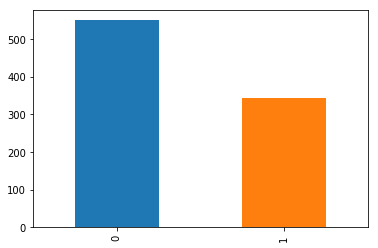

In [48]:
train_dat.Survived.value_counts().plot.bar()

### --Exercise-- 
- visualize column 'Pclass' in titanic data using bar-plot

### Fare

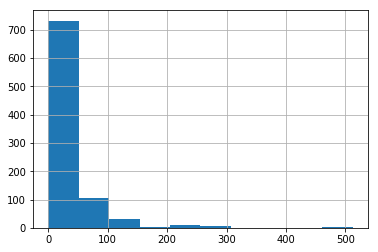

In [49]:
train_dat.Fare.hist()

### --Exercise--
- visualize column 'Age' in titanic data using histogram

### Survival rate v.s. Port Embarked 

In [50]:
train_dat.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

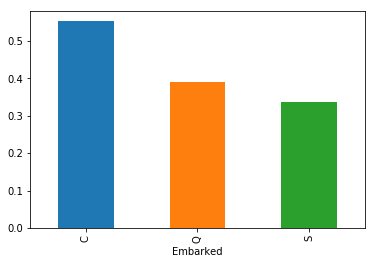

In [51]:
train_dat.groupby('Embarked').Survived.mean().plot.bar()

### Survived v.s. Age

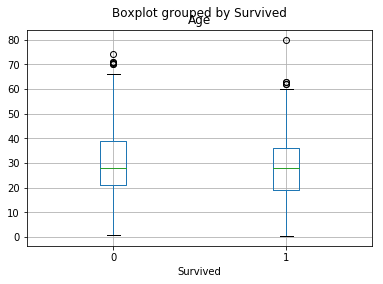

In [52]:
train_dat.boxplot('Age','Survived')

### --Exercise--
- try to explore relationships between other features and survived in titanic data.

### Summarize what we've found
- missing value : Age, Embarked, Cabin
- outlier : Fare
- categorical variables : Embarked, Sex, Ticket, Name, PassengerId

---

## Step 2 : Preprocessing

### Outlier handling
- drop rows containing outlier
- drop columns with outlier
- clipping value
- transform distribution

In [62]:
train_dat.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [63]:
# set fare as 200.0 if fare is greater than 200.0

train_dat.loc[train_dat.Fare>200.0,'Fare'] = 200.0

### Missing data handling
- drop rows containing missing data
- drop columns with missing data
- missing data imputation

In [64]:
# impute age with median of age
age_median = train_dat.Age.median()
train_dat['Age'] = train_dat['Age'].fillna(age_median)

# impute Embarked port with mode of Embarked
embarked_mode = train_dat.Embarked.mode()[0]
train_dat['Embarked'] = train_dat['Embarked'].fillna(embarked_mode)

# drop cabin
train_dat = train_dat.drop('Cabin', axis = 1)

### Categorical feature encoding
- label encoding
- one-hot encoding
- drop column

In [65]:
# Sex
train_dat['Sex'] = train_dat['Sex'].map({'female':1, 'male':2})

# Embarked
train_dat['Embarked'] = train_dat['Embarked'].map({'C':0,'Q':1,'S':2})

# PassengerId, Ticket, Name
train_dat = train_dat.drop(['Ticket','PassengerId','Name'], axis = 1)

---

In [66]:
train_dat.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,2,35.0,0,0,8.0500,2


In [67]:
# the same preprocessing procedure should be done in testing data

test_dat['Age'] = test_dat['Age'].fillna(age_median)
test_dat['Embarked'] = test_dat['Embarked'].fillna(embarked_mode)
test_dat = test_dat.drop('Cabin', axis = 1)

test_dat['Sex'] = test_dat['Sex'].map({'female':1, 'male':2})
test_dat['Embarked'] = test_dat['Embarked'].map({'C':0,'Q':1,'S':2})
test_dat = test_dat.drop(['Ticket','PassengerId','Name'], axis = 1)

In [68]:
test_dat.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,2,62.0,0,0,9.6875,1
3,3,2,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2


In [69]:
train_dat.to_csv('train_dat_processed.csv', index = False)
test_dat.to_csv('test_dat_processed.csv', index = False)

### We are ready to step into next step ->>>

---

## Step 3 : Train-test split

In [71]:
train_set, valid_set = model_selection.train_test_split(train_dat, test_size = 0.2, shuffle = True, random_state = 629)

train_x = train_set.drop(['Survived'], axis = 1)
train_y = train_set['Survived']

valid_x = valid_set.drop(['Survived'], axis = 1)
valid_y = valid_set['Survived']

## Step 4 : Build model

In [73]:
model = tree.DecisionTreeClassifier()

model.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Step 5 : Model Evaluation

In [79]:
train_prediction = model.predict(train_x)

cm = metrics.confusion_matrix(y_true = train_y, y_pred = train_prediction)
acc = metrics.accuracy_score(y_true = train_y, y_pred = train_prediction)

print(' --training set--\r\n')
print(cm)
print('accuracy score : {}'.format(acc))

 --training set--

[[431   2]
 [ 11 268]]
accuracy score : 0.9817415730337079


In [80]:
valid_prediction = model.predict(valid_x)

cm = metrics.confusion_matrix(y_true = valid_y, y_pred = valid_prediction)
acc = metrics.accuracy_score(y_true = valid_y, y_pred = valid_prediction)

print(' --validation set--\r\n')
print(cm)
print('accuracy score : {}'.format(acc))

 --validation set--

[[99 17]
 [13 50]]
accuracy score : 0.8324022346368715


## Step 6: Find a better model

In [88]:
## refine model

model = tree.DecisionTreeClassifier(min_samples_split = 6)

model.fit(train_x, train_y)

train_prediction = model.predict(train_x)

cm = metrics.confusion_matrix(y_true = train_y, y_pred = train_prediction)
acc = metrics.accuracy_score(y_true = train_y, y_pred = train_prediction)

print(' --training set--\r\n')
print(cm)
print('accuracy score : {}'.format(acc))

valid_prediction = model.predict(valid_x)

cm = metrics.confusion_matrix(y_true = valid_y, y_pred = valid_prediction)
acc = metrics.accuracy_score(y_true = valid_y, y_pred = valid_prediction)

print(' --validation set--\r\n')
print(cm)
print('accuracy score : {}'.format(acc))

 --training set--

[[419  14]
 [ 35 244]]
accuracy score : 0.9311797752808989
 --validation set--

[[104  12]
 [ 15  48]]
accuracy score : 0.8491620111731844


In [93]:
from sklearn import ensemble

model = ensemble.RandomForestClassifier(n_estimators = 100, min_samples_split=5)

model.fit(train_x, train_y)

train_prediction = model.predict(train_x)

cm = metrics.confusion_matrix(y_true = train_y, y_pred = train_prediction)
acc = metrics.accuracy_score(y_true = train_y, y_pred = train_prediction)

print(' --training set--\r\n')
print(cm)
print('accuracy score : {}'.format(acc))

valid_prediction = model.predict(valid_x)

cm = metrics.confusion_matrix(y_true = valid_y, y_pred = valid_prediction)
acc = metrics.accuracy_score(y_true = valid_y, y_pred = valid_prediction)

print(' --validation set--\r\n')
print(cm)
print('accuracy score : {}'.format(acc))

 --training set--

[[417  16]
 [ 31 248]]
accuracy score : 0.9339887640449438
 --validation set--

[[108   8]
 [ 17  46]]
accuracy score : 0.8603351955307262


## Something that you can try after the class
- explore data thoroughly
- create more feature based on existing features
- build different kinds of ML models
- try other dataset!
    - ex. sklearn.datasets.boston